


# Exploration Findings

1. **Dataset Overview**
   - The raw_sales has `200 rows × 5 columns`
   - `Spending score` column has values ranging from 1 to 100
   - `Annual Income` column unit is in K$

2. **Missing Values**
   - No missing values
   
3. **Feature Distributions**

4. **Relationships**
    
5. **Outliers**

6. **Time Trends**

7. **Preprocessing notes**
   - change column names
   - Drop the customer_id

8. **Feature engineering notes**

9. **Labeling notes**
   - We need to encode the type of gender to one hot enconding

   

In [92]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

import warnings

warnings.filterwarnings("ignore")

colors = sns.color_palette("Accent")

In [93]:
# Load the data
df = pd.read_csv("Mall_Customers.csv")

In [94]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [95]:
# Change column names

df.rename(
    columns={
        df.columns[0]: "customer_id",
        df.columns[3]: "annual_income",
        df.columns[4]: "spending_score",
    },
    inplace=True,
)

df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [96]:
print(df.isnull().sum())

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64


In [97]:
print("Number of duplicates is: ", df.duplicated().sum())

Number of duplicates is:  0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We need to encode the type of gender

In [99]:
# Label encode the gender
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df["gender"])
df["gender"] = encoder.transform(df["gender"])

# Get the mapping between labels and encoded values
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label to Encoded Value Mapping:", label_mapping)

Label to Encoded Value Mapping: {'Female': 0, 'Male': 1}


In [100]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


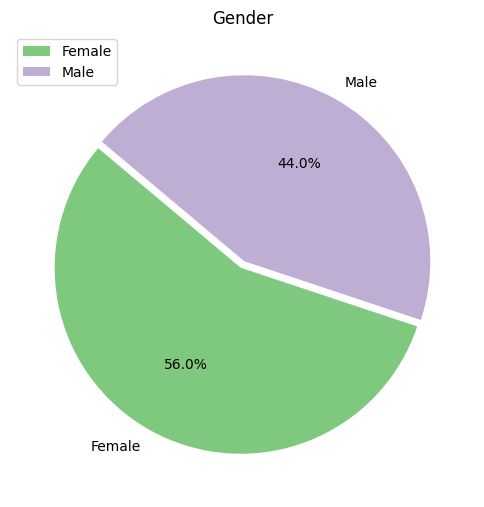

In [101]:
# Create a pie plot for the ages
plt.figure(figsize=(6, 7))
gender_counts = df["gender"].value_counts()
plt.pie(
    gender_counts,
    labels=encoder.classes_,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    explode=np.full(len(encoder.classes_), 0.02),
)
plt.title("Gender")
plt.legend();

In [102]:
df.describe()

,customer_id,gender,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


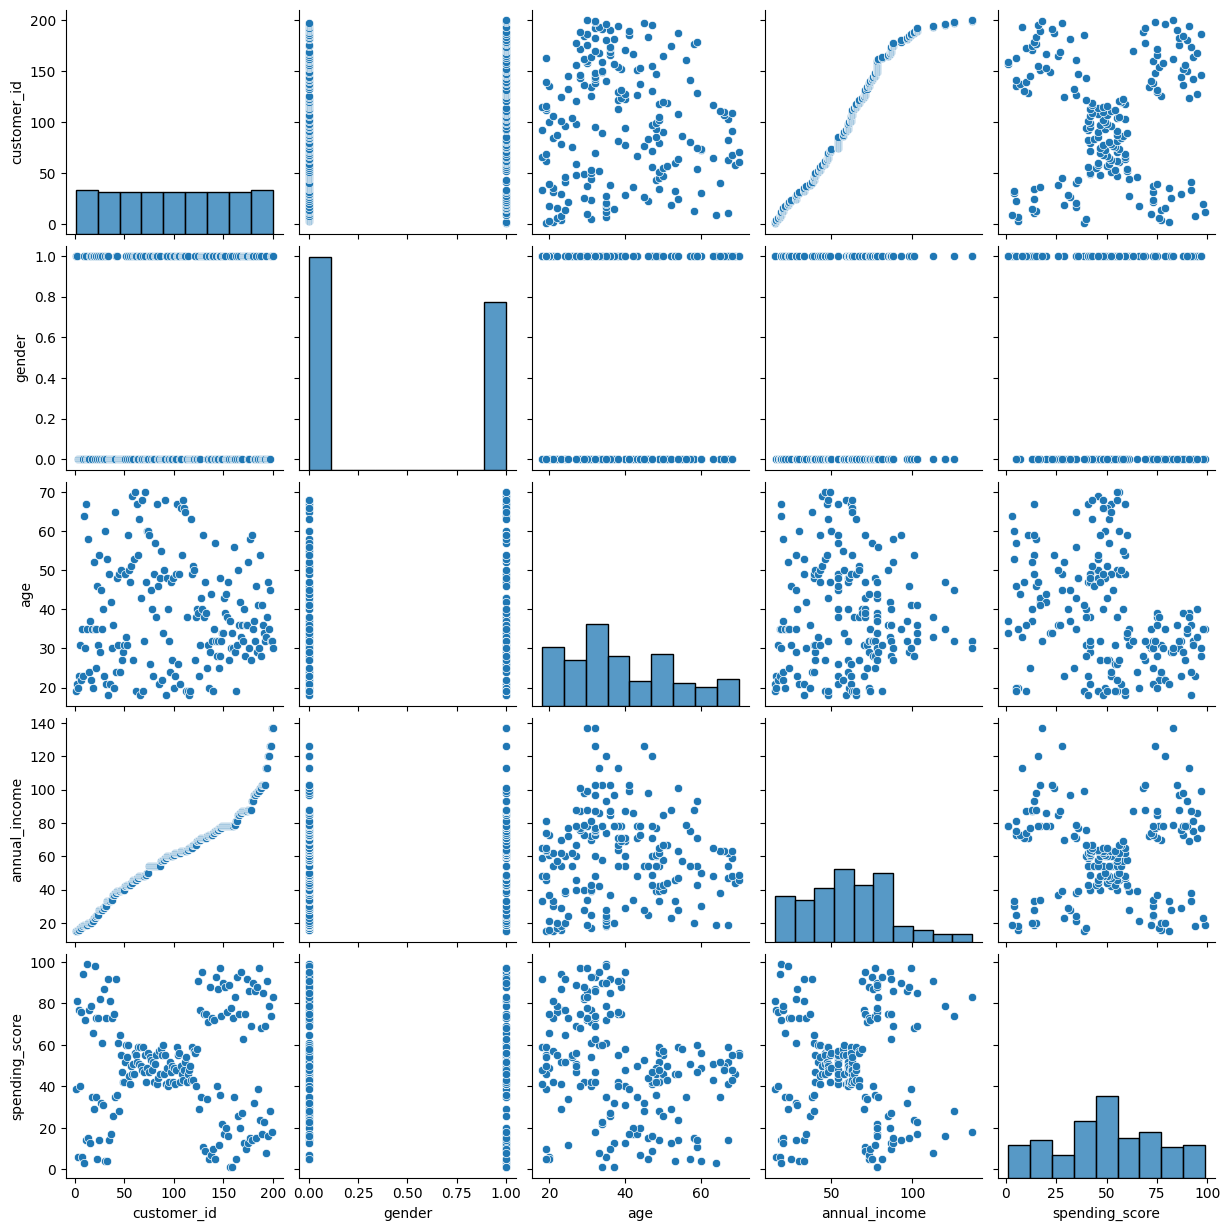

In [103]:
sns.pairplot(df)

# Modelling

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [15]:
# Drop customer id
df.drop(columns=["customer_id"], axis=1, inplace=True)
df

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [66]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["age", "annual_income", "spending_score"]])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=["age", "annual_income", "spending_score"])

# Add the gender column
df_scaled["gender"] = df["gender"]

df_scaled.shape

(200, 4)

In [109]:
# Fit K-means model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [110]:
labels = kmeans.labels_

In [111]:
score = silhouette_score(df, labels)
print("The silhouette score is", score)

The silhouette score is 0.42245261332521894


# Add the labels to the data

In [112]:
df["cluster"] = labels
# Add the customer_id again
df["cutomer_id"] = np.arange(1, len(df) + 1)

In [113]:
# arrange columns
df = df[[df.columns[-1]] + df.columns[:-1].to_list()]

In [117]:
df

,cutomer_id,gender,age,annual_income,spending_score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [118]:
# Save the data
df.to_csv("data_with_clusters.csv", index=False)